Missing values:
 Study Hours    2
Attendance     2
Pass           0
dtype: int64

Summary statistics:
        Study Hours  Attendance       Pass
count    18.000000   18.000000  20.000000
mean      8.611111   72.722222   0.600000
std       3.743840   16.127454   0.502625
min       2.000000   40.000000   0.000000
25%       6.250000   63.000000   0.000000
50%       8.500000   72.500000   1.000000
75%      11.000000   87.500000   1.000000
max      15.000000   93.000000   1.000000


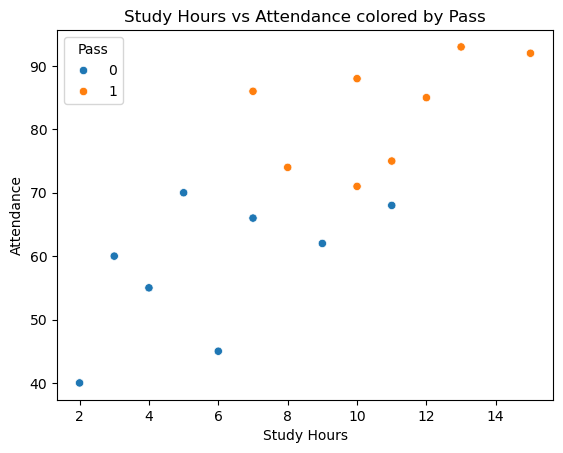

Accuracy: 1.0


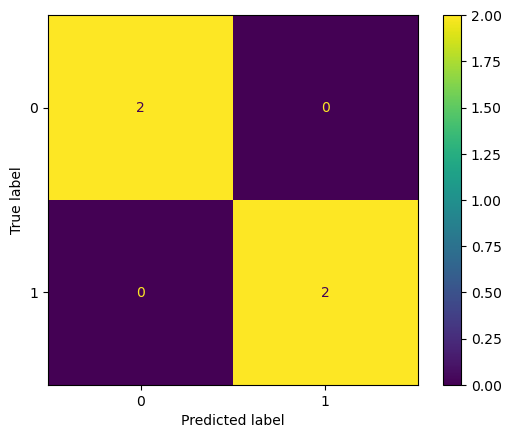

Accuracy: 0.4
Precision: 1.0
Recall: 0.14285714285714285
F1 Score: 0.25
                   Review Text Sentiment Predicted Sentiment
13                    So good!  positive            positive
39      Faulty and misleading.  negative            negative
30            Truly excellent!  positive            negative
45         It stopped working.  negative            negative
17          Worth every penny.  positive            negative
48    Happy with this product.  positive            negative
26    Delighted with this buy.  positive            negative
25         Very poor material.  negative            negative
32  Will definitely recommend.  positive            negative
19      Exactly what I needed.  positive            negative


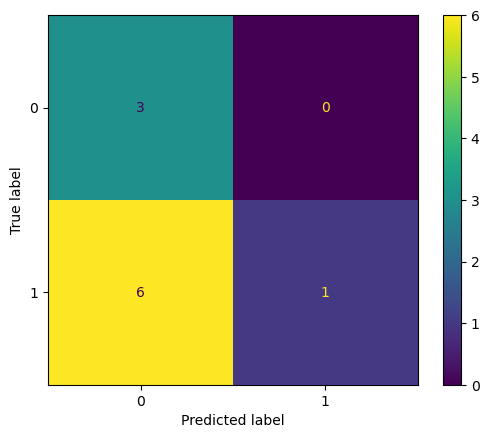

In [17]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load or create dataset
data = {"Study Hours": [12, 4, 8, 2, np.nan, 10, 7, 14, 11, 9, 13, np.nan, 6, 15, 5, 10, 11, 3, 8, 7],
    "Attendance": [85, 55, 74, 40, 90, 71, 86, np.nan, 68, 62, 93, 89, 45, 92, 70, 88, 75, 60, np.nan, 66],
    "Pass":        [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]}
df = pd.DataFrame(data)

# Step 3: Data Exploration
print("Missing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

# Visualizations
sns.scatterplot(data=df, x='Study Hours', y='Attendance', hue='Pass')
plt.title("Study Hours vs Attendance colored by Pass")
plt.show()

# Step 4: Handle missing values
df['Study Hours'] = df['Study Hours'].fillna(df['Study Hours'].mean())
df['Attendance'] = df['Attendance'].fillna(df['Attendance'].mean())


# Step 5: Train-test split
X = df[['Study Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Model prediction and evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

#TASK 2
# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings

# Step 2: Download NLTK stopwords (quietly)
warnings.filterwarnings("ignore", category=UserWarning, module='nltk')
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Step 3: Load dataset
df = pd.read_csv("reviews_dataset.csv")  # If local, use full path or upload

# Step 4: Text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned Text'] = df['Review Text'].apply(clean_text)

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned Text'])

# Step 6: Encode labels
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Step 10: Show predictions
df_test = df.iloc[y_test.index].copy()
df_test.loc[:, 'Predicted Sentiment'] = ['positive' if x == 1 else 'negative' for x in y_pred]
print(df_test[['Review Text', 'Sentiment', 'Predicted Sentiment']])


